In [1]:
%load_ext autoreload
%autoreload 2

# Bootstrap

In [2]:
cache = dict()

In [11]:
from price_detector_fa.samples import *
from price_detector_fa.utils import *
from price_detector_fa.extractors import *
from price_detector_fa.preprocessing import *
from price_detector_fa.hardcoded import *

# Tests

قیمت طلا هر گرم ۳۵۹ هزار تومان و سکه ۱۰۰ هزار تومان است
ic| text: 'قیمت طلا هر گرم ۳۵۹ هزار تومان و سکه ۱۰۰ هزار تومان است'
ic| s_chunks: '[قیمت طلا NP] [یک گرم ۳۵۹ هزار تومان و سکه NP] [۱۰۰ هزار تومان NP] [است VP]'


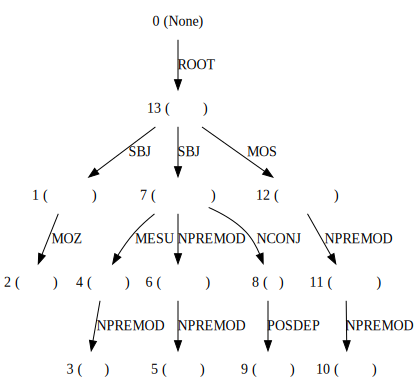

ic| extracted_show(price_extracted): ['مقدار:  ۳۵۹ هزار تومان', 'مقدار:  ۱۰۰ هزار تومان']
ic| extracted_show(unit_extracted): ['مقدار:  یک گرم']
ic| cost_extracted: [{'nodes': [{'address': 2,
                                 'ctag': 'N',
                                 'deps': defaultdict(<class 'list'>, {}),
                                 'feats': '_',
                                 'head': 1,
                                 'lemma': 'طلا',
                                 'rel': 'MOZ',
                                 'tag': 'N',
                                 'word': 'طلا'}]}]
    extracted_show(cost_extracted): ['مقدار:  طلا']



In [12]:
for s in (
    # sample_1,
    # sample_2,
    # sample_2_1,
    # sample_2_2,
    # sample_2_3,
    # sample_2_4,
    # sample_2_5,
    # sample_2_6,
    # sample_2_7,
    # sample_2_8,
    sample_2_9,
    # sample_3,
    # sample_4,
    # sample_5_e,
    # sample_6,
    # sample_7,
    # sample_8,
    # sample_8_2,
    # sample_8_3,
    # *samples_evil,
    # *samples,
):
    print(s)
    if True or s not in cache:
        #: @todo6/Hoseini fix the return types
        s_tokens = preprocess(s)

        s_parsed = parser.parse(s_tokens)
        s_tagged = tagger.tag(s_tokens)
        s_chunks = tree2brackets(chunker.parse(s_tagged))
        cache[s] = dict(
            s_tokens=s_tokens,
            s_parsed=s_parsed,
            s_tagged=s_tagged,
            s_chunks=s_chunks,
        )
    s_cached = cache[s]
    s_tokens = s_cached["s_tokens"]
    s_parsed = s_cached["s_parsed"]
    s_tagged = s_cached["s_tagged"]
    s_chunks = s_cached["s_chunks"]
    ic(s_chunks)

    display(s_parsed)
    all_extract(s_parsed)
    print()